In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)
library(xtable)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 4.2

In [2]:
y_a = c(12, 9, 12, 14, 13, 12, 15, 8, 15, 6)
y_b = c(11, 11, 10, 9, 9 , 8, 7, 10, 6, 8, 8, 9, 7 )

In [3]:
thetas <- seq(0, 1, length.out = 2000)

In [4]:
y_a_sum  =sum(y_a)
n_a = length(y_a)
post_a <- dgamma(thetas,y_a_sum, n_a )

In [5]:
y_b_sum  =sum(y_b)
n_b = length(y_b)
post_b <- dgamma(thetas,y_b_sum, n_b )

In [6]:
1e6

[1] 1e+06

In [7]:
set.seed(1)
a <- rgamma(1e6, y_a_sum, n_a)
b <- rgamma(1e6, y_b_sum, n_b)
mean(a > b)

[1] 0.985349

In [8]:
qgamma(c(0.025, 0.975), shape = 237, rate = 20)

[1] 10.38924 13.40545

In [9]:

alpha0_A <- 120
beta0_A  <- 10

post_params <- function(sum_y, n, alpha0, beta0) {
  list(alpha = alpha0 + sum_y,
       beta  = beta0  + n)
}

n0_grid <- c(0.5, 1, 2, 5, 10, 20, 50, 100)
M <- 200000  
set.seed(123)

res_theta <- data.frame(n0 = n0_grid, Pr_thetaB_lt_thetaA = NA_real_)
res_pred  <- data.frame(n0 = n0_grid, Pr_YtildeB_lt_YtildeA = NA_real_)

## Loop over n0 values
for (i in seq_along(n0_grid)) {
  n0 <- n0_grid[i]

  pA <- post_params(y_a_sum, n_a, alpha0_A, beta0_A)
  pB <- post_params(y_b_sum, n_b, alpha0 = 12 * n0, beta0 = n0)

  #posteriors
  theta_A <- rgamma(M, shape = pA$alpha, rate = pA$beta)
  theta_B <- rgamma(M, shape = pB$alpha, rate = pB$beta)
  res_theta$Pr_thetaB_lt_thetaA[i] <- mean(theta_B < theta_A)

  # posterior predictive
  Ytilde_A <- rpois(M, lambda = theta_A)  
  Ytilde_B <- rpois(M, lambda = theta_B)   
  res_pred$Pr_YtildeB_lt_YtildeA[i] <- mean(Ytilde_B < Ytilde_A)
}


In [10]:
plot_data <- res_theta %>%
  rename(prob = Pr_thetaB_lt_thetaA) %>%
  mutate(type = "Posterior") %>%
  bind_rows(
    res_pred %>%
      rename(prob = Pr_YtildeB_lt_YtildeA) %>%
      mutate(type = "Posterior Predictive")
  )


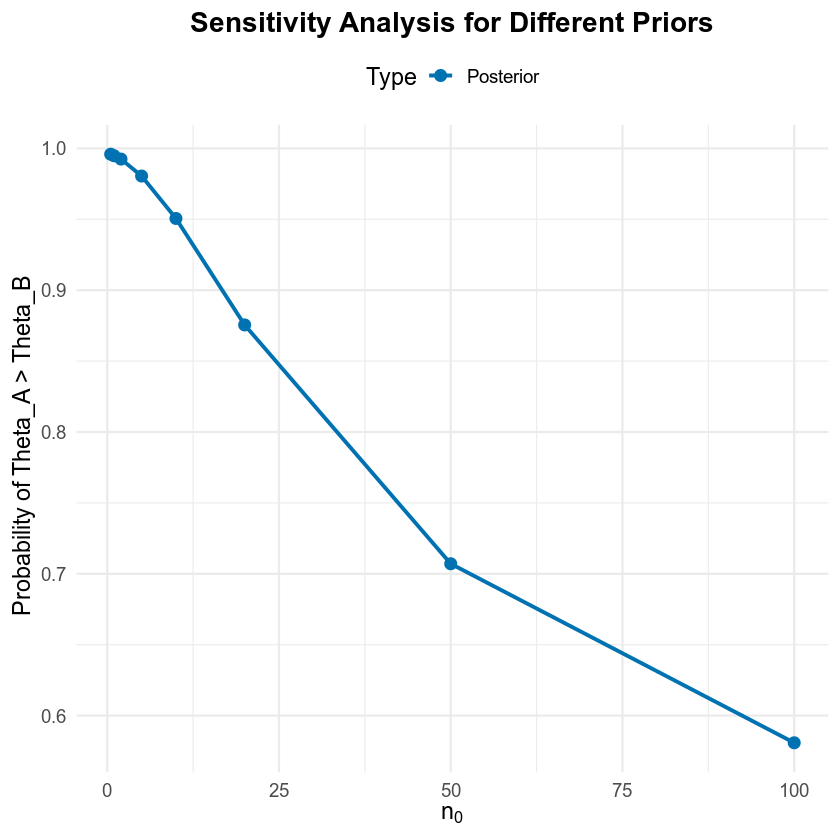

In [11]:

p <- ggplot(subset(plot_data, type=="Posterior"), aes(x = n0, y = prob, color = type)) +
  geom_line(linewidth = 1.1) +
  geom_point(size = 3) +
  scale_color_manual(values = c("#0072B2", "#D55E00")) +
  labs(
    x = expression(n[0]),
    y = " Probability of Theta_A > Theta_B",
    title = "Sensitivity Analysis for Different Priors",
    color = "Type"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, face = "bold")
  )


p
ggsave("../Figures/Assignment_3/4.2_A.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

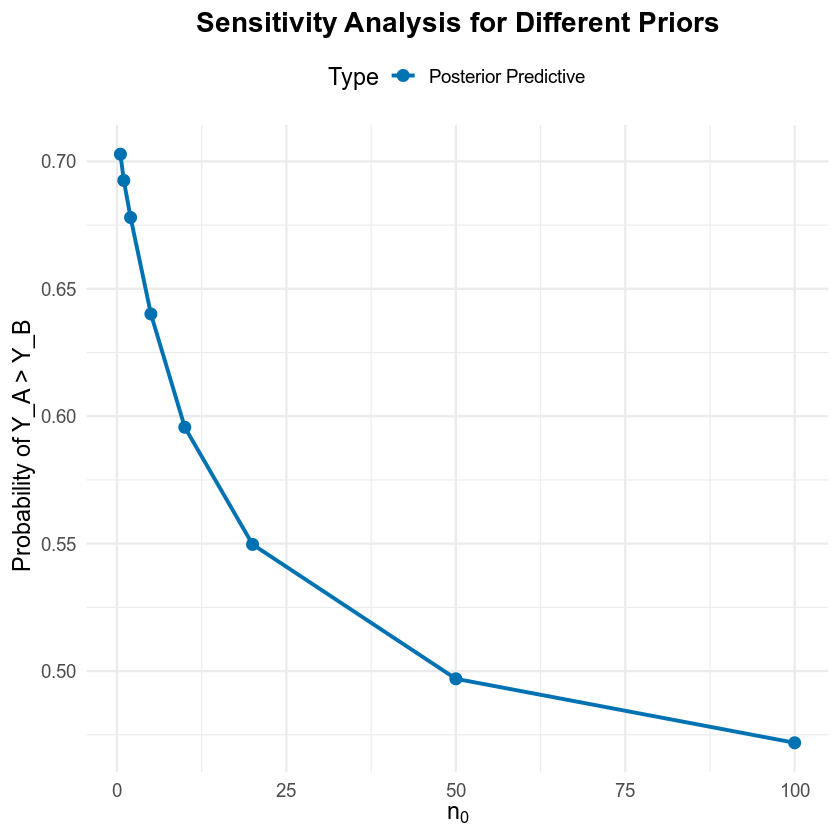

In [12]:

p <- ggplot(subset(plot_data, type == 'Posterior Predictive'), aes(x = n0, y = prob, color=type)) +
  geom_line(linewidth = 1.1) +
  geom_point(size = 3) +
  scale_color_manual(values = c("#0072B2", "#D55E00")) +
  labs(
    x = expression(n[0]),
    y = " Probability of Y_A > Y_B",
    title = "Sensitivity Analysis for Different Priors",
    color = "Type"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, face = "bold")
  )


p
ggsave("../Figures/Assignment_3/4.2_b.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

## 4.5

In [13]:
noreact <- read.table('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/cancer_noreact.dat',
header=T)
react <- read.table('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/cancer_react.dat',
header=T)



In [14]:
react

x,y
<int>,<int>
6,15
5,16
3,12
4,6
27,77
7,17
4,11
5,10
23,63


In [15]:
sum_reactY  <- sum(react$y)
sum_reactX  <- sum(react$x)
sum_noreactY <- sum(noreact$y)
sum_noreactX <- sum(noreact$x)


In [16]:
sum_reactX

[1] 95

In [17]:
a1 <- 1; b1 <- 1
a2 <- 1; b2 <- 1  

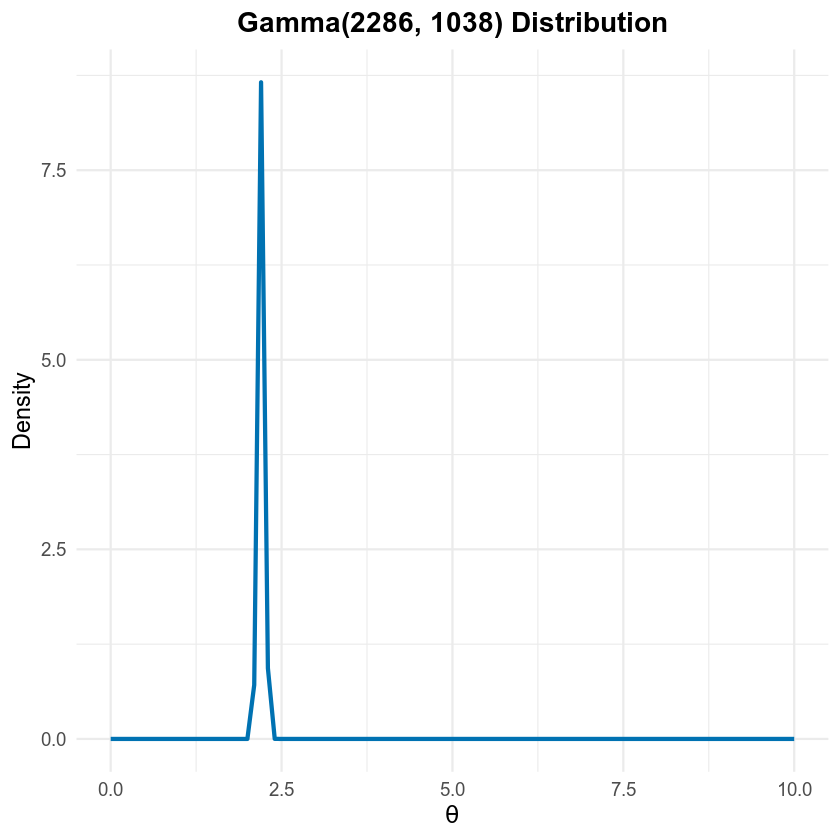

In [18]:
p <- ggplot(data.frame(x = c(0, 10)), aes(x = x)) +
  stat_function(
    fun = dgamma,
    args = list(shape = a1 + sum_noreactY,
                rate  = b1 + sum_noreactX),
    color = "#0072B2", linewidth = 1.2
  ) +
  labs(
    title = paste0("Gamma(", a1 + sum_noreactY, ", ", b1 + sum_noreactX, ") Distribution"),
    x = expression(theta),
    y = "Density"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

p
ggsave("../Figures/Assignment_3/4.5_a.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

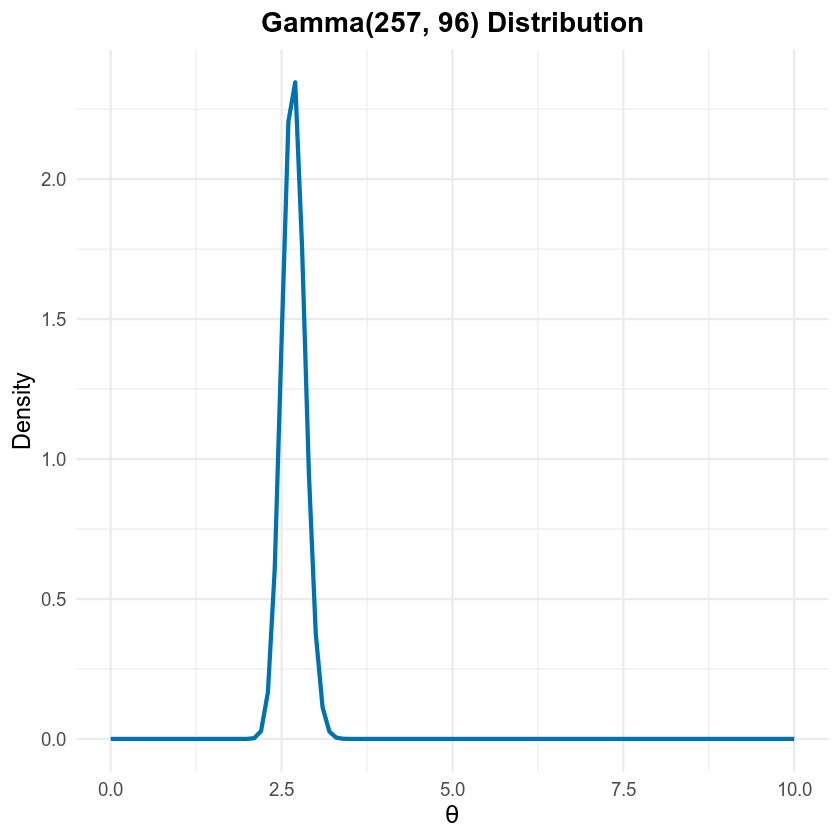

In [19]:
p <- ggplot(data.frame(x = c(0, 10)), aes(x = x)) +
  stat_function(
    fun = dgamma,
    args = list(shape = a2 + sum_reactY,
                rate  = b2 + sum_reactX),
    color = "#0072B2", linewidth = 1.2
  ) +
  labs(
    title = paste0("Gamma(", a2 + sum_reactY, ", ", b2 + sum_reactX, ") Distribution"),
    x = expression(theta),
    y = "Density"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

p
ggsave("../Figures/Assignment_3/4.5_b.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

In [20]:
priors <- tibble::tribble(
  ~label,        ~a1,        ~b1,   ~a2,        ~b2,
  "Opinion 1",  2.2*100,     100,  2.2*100,     100,
  "Opinion 2",  2.2*100,     100,  2.2,           1,
  "Opinion 3",  2.2,           1,  2.2,           1
)

post_params <- priors %>%
  transmute(
    label,
    alpha1 = a1 + sum_noreactY, beta1 = b1 + sum_noreactX,
    alpha2 = a2 + sum_reactY, beta2 = b2 + sum_reactX
  )

# post_params <- priors %>%
#   transmute(
#     label,
#     alpha1 = a1, beta1 = b1,
#     alpha2 = a2, beta2 = b2
#   )

In [21]:
post_params

label,alpha1,beta1,alpha2,beta2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Opinion 1,2505.0,1137,476.0,195
Opinion 2,2505.0,1137,258.2,96
Opinion 3,2287.2,1038,258.2,96


summary table

In [22]:
posterior_params <- function(a0, b0, Sy, Sx) {
  list(alpha = a0 + Sy, beta = b0 + Sx)
}

posterior_summary <- function(alpha, beta) {
  c(
    mean = alpha / beta,
    q025 = qgamma(0.025, alpha, rate = beta),
    q975 = qgamma(0.975, alpha, rate = beta)
  )
}

mc_prob_theta2_gt_theta1 <- function(p1, p2, M = 2e5) {
  theta1 <- rgamma(M, p1$alpha, rate = p1$beta)
  theta2 <- rgamma(M, p2$alpha, rate = p2$beta)
  mean(theta2 > theta1)
}


In [23]:
set.seed(123)
results <- post_params %>%
  dplyr::rowwise() %>%
  dplyr::mutate(
    summ1 = list(posterior_summary(alpha1, beta1)),
    summ2 = list(posterior_summary(alpha2, beta2)),
    pr_t2_gt_t1  = mc_prob_theta2_gt_theta1(
      list(alpha = alpha1, beta = beta1),
      list(alpha = alpha2, beta = beta2)
    )
  ) %>%
  dplyr::ungroup()

summary_table <- results %>%
  dplyr::transmute(
    Prior = label,
    E_theta1    = summ1[[1]]["mean"],
    theta1_2.5  = summ1[[1]]["q025"],
    theta1_97.5 = summ1[[1]]["q975"],
    E_theta2    = summ2[[1]]["mean"],
    theta2_2.5  = summ2[[1]]["q025"],
    theta2_97.5 = summ2[[1]]["q975"],
    Pr_t2_gt_t1 = pr_t2_gt_t1
  )


print(summary_table, n = Inf, width = Inf, digits =6)

# A tibble: 3 × 8
  Prior     E_theta1 theta1_2.5 theta1_97.5 E_theta2 theta2_2.5 theta2_97.5
  <chr>        <dbl>      <dbl>       <dbl>    <dbl>      <dbl>       <dbl>
1 Opinion 1     2.20       2.12        2.29     2.44       2.23        2.67
2 Opinion 2     2.20       2.12        2.29     2.44       2.23        2.67
3 Opinion 3     2.20       2.12        2.29     2.44       2.23        2.67
  Pr_t2_gt_t1
        <dbl>
1       0.977
2       0.999
3       0.998


posterior plots

In [24]:


plot_one_opinion <- function(alpha1, beta1, alpha2, beta2, label) {
  xmax <- max(
    qgamma(0.999, alpha1, rate = beta1),
    qgamma(0.999, alpha2, rate = beta2)
  )
  x <- seq(0, xmax, length.out = 1000)

  df <- bind_rows(
    tibble(x = x, density = dgamma(x, alpha1, rate = beta1),
           group = "no reactors"),
    tibble(x = x, density = dgamma(x, alpha2, rate = beta2),
           group = "near reactors")
  )

  ggplot(df, aes(x = x, y = density, color = group)) +
    geom_line(linewidth = 1.2) +
    scale_color_manual(values = c("#0072B2", "#D55E00")) +
    labs(
      title = paste("Posterior Densities —", label),
      x = expression(theta), y = "Density", color = NULL
    ) +
    theme_minimal(base_size = 14) +
    theme(legend.position = "top",
          plot.title = element_text(hjust = 0.5, face = "bold"))
}

plots <- lapply(seq_len(nrow(post_params)), function(i) {
  with(post_params[i, ],
       plot_one_opinion(alpha1, beta1, alpha2, beta2, label))
})


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 1' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 1' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 1' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 1' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 1' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :

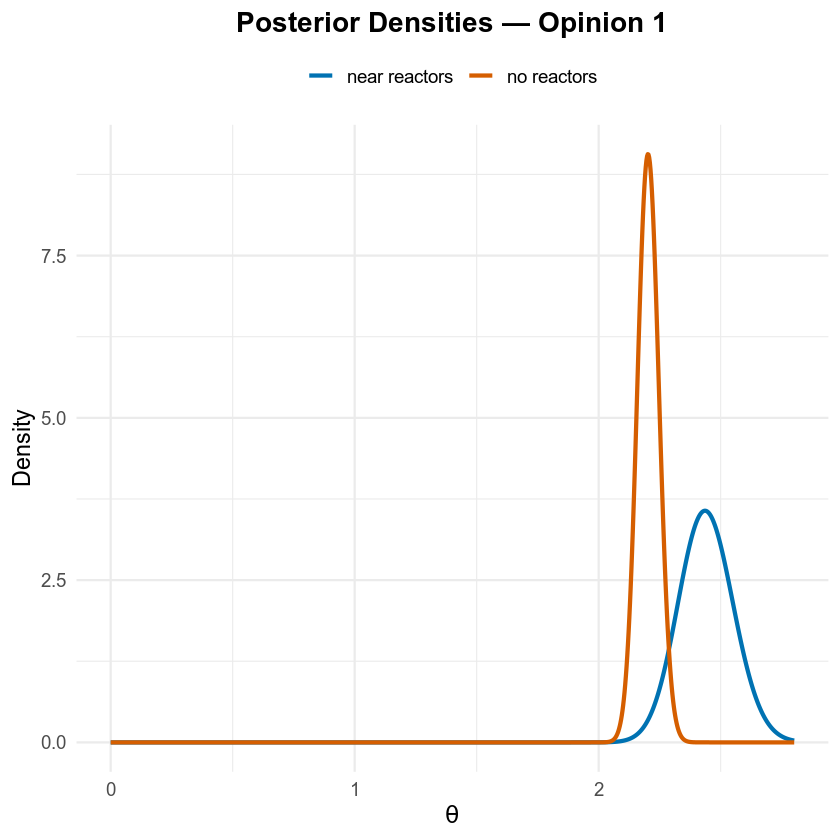

In [25]:

p <- plots[[1]]
p 
ggsave("../Figures/Assignment_3/4.5_c.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 2' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 2' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 2' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 2' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 2' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :

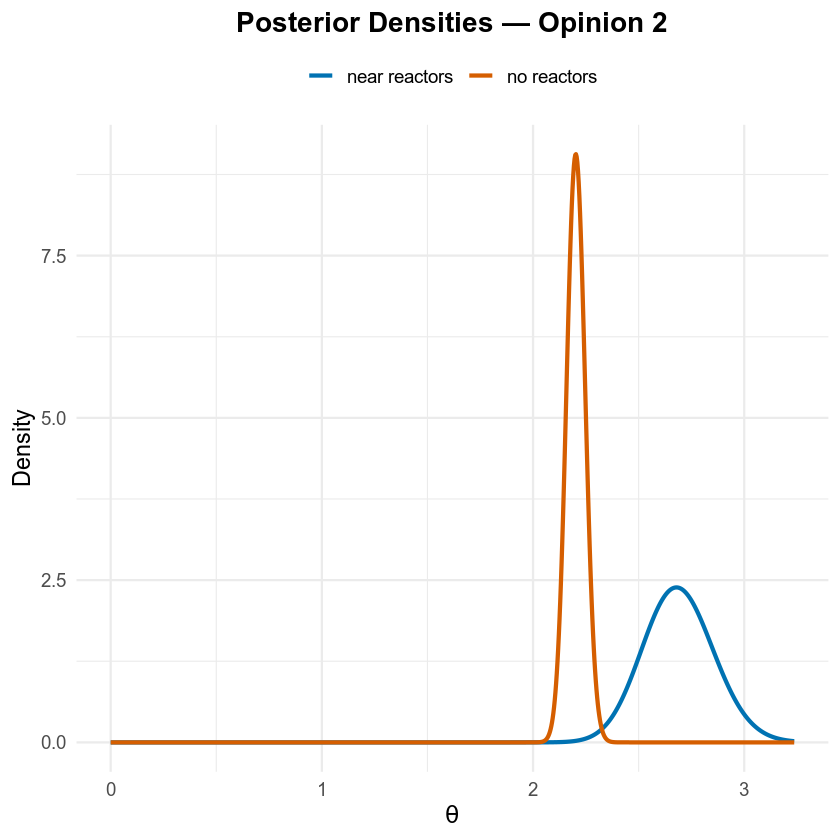

In [26]:
p <- plots[[2]]
p
ggsave("../Figures/Assignment_3/4.5_d.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 3' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 3' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 3' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 3' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Posterior Densities — Opinion 3' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :

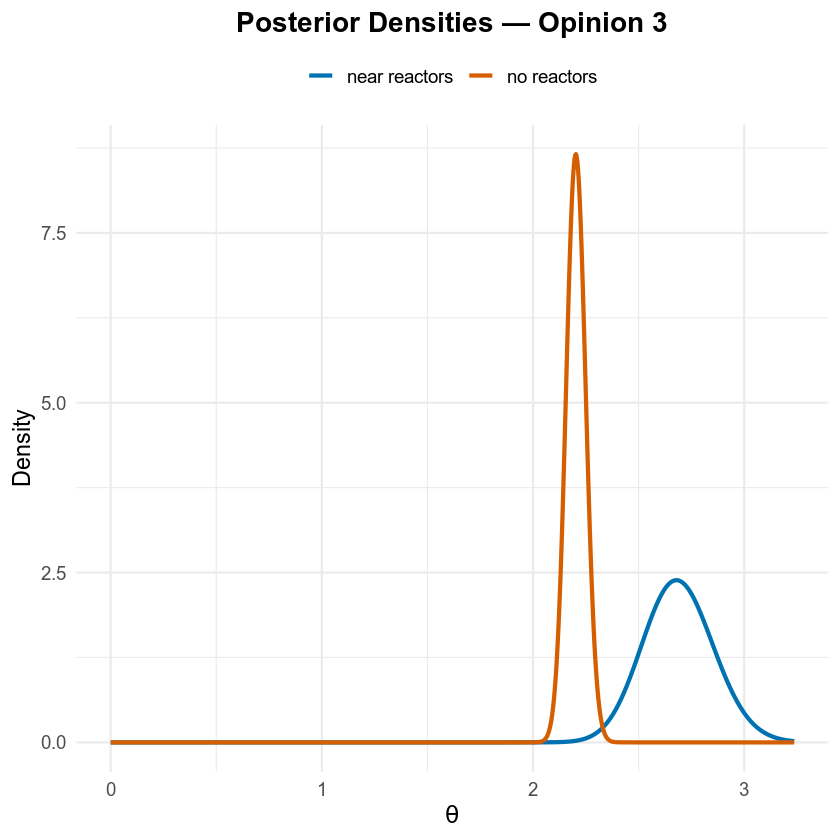

In [27]:
p <- plots[[3]]
p
ggsave("../Figures/Assignment_3/4.5_e.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")

In [28]:
school1 <- read.table('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/school1.dat',
header=T)
school2 <- read.table('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/school2.dat',
header=T)
school3 <- read.table('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/school3.dat',
header=T)

In [29]:
mu0     <- 5
sig20   <- 4
kappa0  <- 1
nu0     <- 2


In [30]:
summarize_school <- function(y, mu0, sig20, kappa0, nu0) {
  n    <- length(y)
  ybar <- mean(y)
  s2   <- var(y)           

  kappa_n <- kappa0 + n
  mu_n    <- (kappa0*mu0 + n*ybar) / kappa_n
  nu_n    <- nu0 + n
  sig2_n  <- (nu0*sig20 + (n-1)*s2 + (kappa0*n/kappa_n)*(ybar - mu0)^2) / nu_n

  # 95% CI for theta 
  scale_theta <- sqrt(sig2_n) / sqrt(kappa_n)
  t_q         <- qt(c(0.025, 0.975), df = nu_n)
  theta_ci    <- mu_n + t_q * scale_theta

  # 95% CI for sigma 
  chi_q       <- qchisq(c(0.975, 0.025), df = nu_n) 
  sig2_ci     <- (nu_n * sig2_n) / chi_q
  sigma_ci    <- sqrt(sort(sig2_ci))                 

  # Posterior means
  post_mean_theta <- mu_n
  post_mean_sig2  <- if (nu_n > 2) (nu_n*sig2_n)/(nu_n - 2) else NA_real_
  post_mean_sigma <- if (nu_n > 1) {
    sqrt(nu_n*sig2_n/2) * gamma((nu_n - 1)/2) / gamma(nu_n/2)
  } else NA_real_

  data.frame(
    # n = n, ybar = ybar,
    post_mean_theta = post_mean_theta,
    theta_lo = theta_ci[1], theta_hi = theta_ci[2],
    post_mean_sigma = post_mean_sigma,
    sigma_lo = sigma_ci[1], sigma_hi = sigma_ci[2],
    post_mean_sigma2 = post_mean_sig2, 
    kappa_n = kappa_n, nu_n = nu_n, sig2_n = sig2_n,
    check.names = FALSE
  )
}

In [31]:
tables = c(school1, school2, school3)
results_list <- lapply(tables, function(f) {
  out <- summarize_school(f, mu0, sig20, kappa0, nu0)
  out
})

In [32]:
results <- do.call(rbind, results_list)
print(results)

      post_mean_theta theta_lo  theta_hi post_mean_sigma sigma_lo sigma_hi
X2.11        9.579600 8.102114 11.057086        3.701929 2.830279 4.925236
X0.29        7.238261 5.463463  9.013059        4.258782 3.220180 5.737190
X4.33        7.986500 6.302743  9.670257        3.756927 2.785713 5.174442
      post_mean_sigma2 kappa_n nu_n   sig2_n
X2.11         13.99270      25   26 12.91633
X0.29         18.55401      23   24 17.00784
X4.33         14.49069      20   21 13.11062


In [33]:
results_round <- within(results, {
  # ybar             <- round(ybar, 2)
  post_mean_theta  <- round(post_mean_theta, 2)
  theta_lo         <- round(theta_lo, 2)
  theta_hi         <- round(theta_hi, 2)
  post_mean_sigma  <- round(post_mean_sigma, 2)
  sigma_lo         <- round(sigma_lo, 2)
  sigma_hi         <- round(sigma_hi, 2)
})

latex_table <- xtable(results_round, 
                      caption = "Posterior summaries for each school",
                      label = "tab:posterior")

print(latex_table, include.rownames = FALSE)

% latex table generated in R 4.1.2 by xtable 1.8-4 package
% Tue Nov  4 20:02:09 2025
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrrrr}
  \hline
post\_mean\_theta & theta\_lo & theta\_hi & post\_mean\_sigma & sigma\_lo & sigma\_hi & post\_mean\_sigma2 & kappa\_n & nu\_n & sig2\_n \\ 
  \hline
9.58 & 8.10 & 11.06 & 3.70 & 2.83 & 4.93 & 13.99 & 25.00 & 26.00 & 12.92 \\ 
  7.24 & 5.46 & 9.01 & 4.26 & 3.22 & 5.74 & 18.55 & 23.00 & 24.00 & 17.01 \\ 
  7.99 & 6.30 & 9.67 & 3.76 & 2.79 & 5.17 & 14.49 & 20.00 & 21.00 & 13.11 \\ 
   \hline
\end{tabular}
\caption{Posterior summaries for each school} 
\label{tab:posterior}
\end{table}


In [34]:
mu_n     <- c(9.58, 7.24, 7.99)
sigma2_n <- c(12.92, 17.01, 13.11)
kappa_n  <- c(25, 23, 20)
nu_n     <- c(26, 24, 21)

In [35]:
r_1 <- mu_n[1] + sqrt(sigma2_n[1] / kappa_n[1]) * rt(1e6, df = nu_n[1])
r_2 <- mu_n[2] + sqrt(sigma2_n[2] / kappa_n[2]) * rt(1e6, df = nu_n[2])
r_3 <- mu_n[3] + sqrt(sigma2_n[3] / kappa_n[3]) * rt(1e6, df = nu_n[3])

In [36]:
mat <- cbind(r_1, r_2, r_3)

perms <- rbind(
  c(1, 2, 3),
  c(1, 3, 2),
  c(2, 1, 3),
  c(2, 3, 1),
  c(3, 1, 2),
  c(3, 2, 1)
)

In [37]:

probs <- numeric(nrow(perms))
for (i in seq_len(nrow(perms))) {
  a <- perms[i, 1]; b <- perms[i, 2]; c <- perms[i, 3]
  probs[i] <- mean(mat[, a] < mat[, b] & mat[, b] < mat[, c])
}

ordering_table <- data.frame(
  Permutation = apply(perms, 1, function(x) paste0("θ", x, collapse = " < ")),
  Probability = round(probs, 4)
)

print(ordering_table)

   Permutation Probability
1 θ1 < θ2 < θ3      0.0047
2 θ1 < θ3 < θ2      0.0032
3 θ2 < θ1 < θ3      0.0715
4 θ2 < θ3 < θ1      0.6555
5 θ3 < θ1 < θ2      0.0153
6 θ3 < θ2 < θ1      0.2497


In [38]:
latex_table <- xtable(ordering_table, 
                      caption = "Pr(i < j < k) for each permutation of schools (1,2,3)",
                      label = "tab:posterior")

In [39]:
print(latex_table)

% latex table generated in R 4.1.2 by xtable 1.8-4 package
% Tue Nov  4 20:02:09 2025
\begin{table}[ht]
\centering
\begin{tabular}{rlr}
  \hline
 & Permutation & Probability \\ 
  \hline
1 & θ1 $<$ θ2 $<$ θ3 & 0.00 \\ 
  2 & θ1 $<$ θ3 $<$ θ2 & 0.00 \\ 
  3 & θ2 $<$ θ1 $<$ θ3 & 0.07 \\ 
  4 & θ2 $<$ θ3 $<$ θ1 & 0.66 \\ 
  5 & θ3 $<$ θ1 $<$ θ2 & 0.02 \\ 
  6 & θ3 $<$ θ2 $<$ θ1 & 0.25 \\ 
   \hline
\end{tabular}
\caption{Pr(i < j < k) for each permutation of schools (1,2,3)} 
\label{tab:posterior}
\end{table}


In [40]:
s_1 <- rnorm(1e6, 3.7, 3.70)
s_2 <- rnorm(1e6, 18.55, 4.26)
s_3 <- rnorm(1e6, 7.99, 3.76)

In [41]:
ytilde_i <- rnorm(1e6, mean = s_1, sd = sqrt(s_1))

Warning message in sqrt(s_1):
“NaNs produced”
Warning message in rnorm(1e+06, mean = s_1, sd = sqrt(s_1)):
“NAs produced”


### 6.2

In [42]:
glucose <- read.table('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/glucose.dat',
header=T)

In [43]:
length(glucose$X86)

[1] 531

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


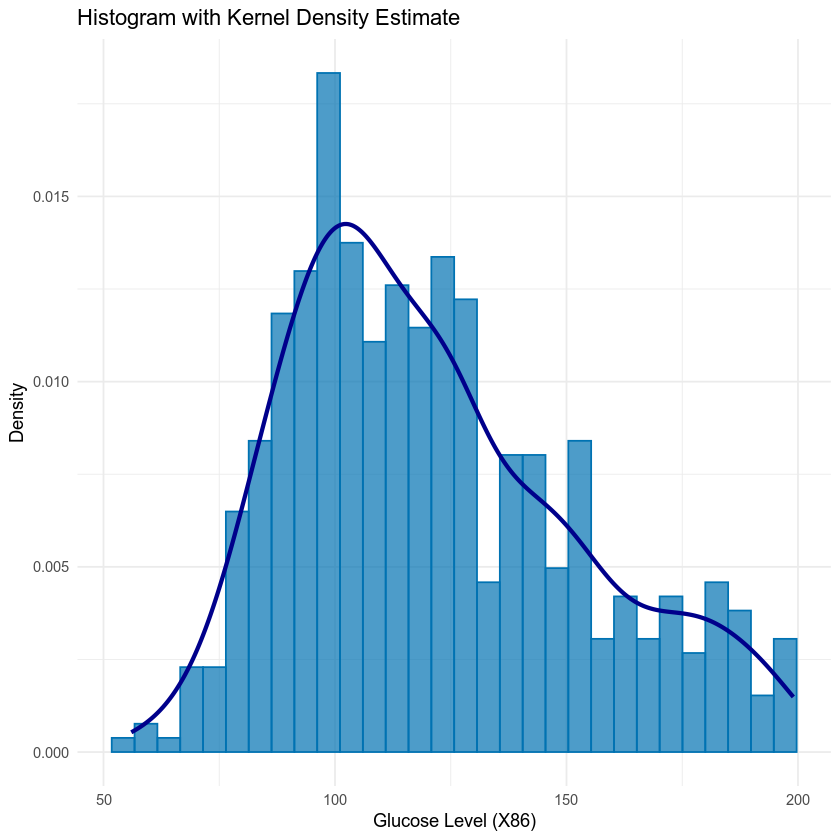

In [44]:
p <- ggplot(data = glucose, aes(x = X86)) +
  geom_histogram(aes(y = ..density..),  
                 bins = 30,             
                 fill = "#0072B2",
                 color = "#0072B2",
                 alpha = 0.7) +
  geom_density(color = "darkblue", linewidth = 1.2) +
  labs(
    x = "Glucose Level (X86)",
    y = "Density",
    title = "Histogram with Kernel Density Estimate"
  ) +
  theme_minimal()

p
ggsave("../Figures/Assignment_3/6.2_a.png", plot = p, width = 7, height = 5, dpi = 300, bg = "white")